# Inference Wrappers use cases

This is an example of the PySAL *segregation* framework to perform inference on a single value and comparative inference using simulations under the null hypothesis. Once the segregation classes are fitted, the user can perform inference to shed light for statistical significance in regional analysis. Currently, it is possible to make inference for a single measure or for two values of the same measure.

The summary of the inference wrappers is presented in the following Table:

| **Inference Type** | **Class/Function**   |                 **Function main Inputs**                 |         **Function Outputs**         |
| :----------------- | :------------------- | :------------------------------------------------------: | :----------------------------------: |
| Single Value       | Infer\_Segregation   |   seg\_class, iterations, null\_approach, two\_tailed    |    p\_value, est\_sim, statistic     |
| Two Value          | Compare\_Segregation | seg\_class\_1, seg\_class\_2, iterations, null\_approach | p\_value, est\_sim, est\_point\_diff |

Firstly let's import the module/functions for the use case:

In [1]:
%matplotlib inline

import geopandas as gpd
import segregation
import libpysal

from segregation.infer_segregation import Infer_Segregation

Then it's time to load some data to estimate segregation. We use the data of 2000 Census Tract Data for the metropolitan area of Sacramento, CA, USA. 

We use a geopandas dataframe available in PySAL examples repository.

For more information about the data: https://github.com/pysal/libpysal/tree/master/libpysal/examples/sacramento2

In [2]:
s_map = gpd.read_file(libpysal.examples.get_path("sacramentot2.shp"))
s_map.columns

Index(['FIPS', 'MSA', 'TOT_POP', 'POP_16', 'POP_65', 'WHITE_', 'BLACK_',
       'ASIAN_', 'HISP_', 'MULTI_RA', 'MALES', 'FEMALES', 'MALE1664',
       'FEM1664', 'EMPL16', 'EMP_AWAY', 'EMP_HOME', 'EMP_29', 'EMP_30',
       'EMP16_2', 'EMP_MALE', 'EMP_FEM', 'OCC_MAN', 'OCC_OFF1', 'OCC_INFO',
       'HH_INC', 'POV_POP', 'POV_TOT', 'HSG_VAL', 'FIPSNO', 'POLYID',
       'geometry'],
      dtype='object')

In [3]:
gdf = s_map[['geometry', 'HISP_', 'TOT_POP']]

We also can plot the spatial distribution of the composition of the Hispanic population over the tracts of Sacramento:

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


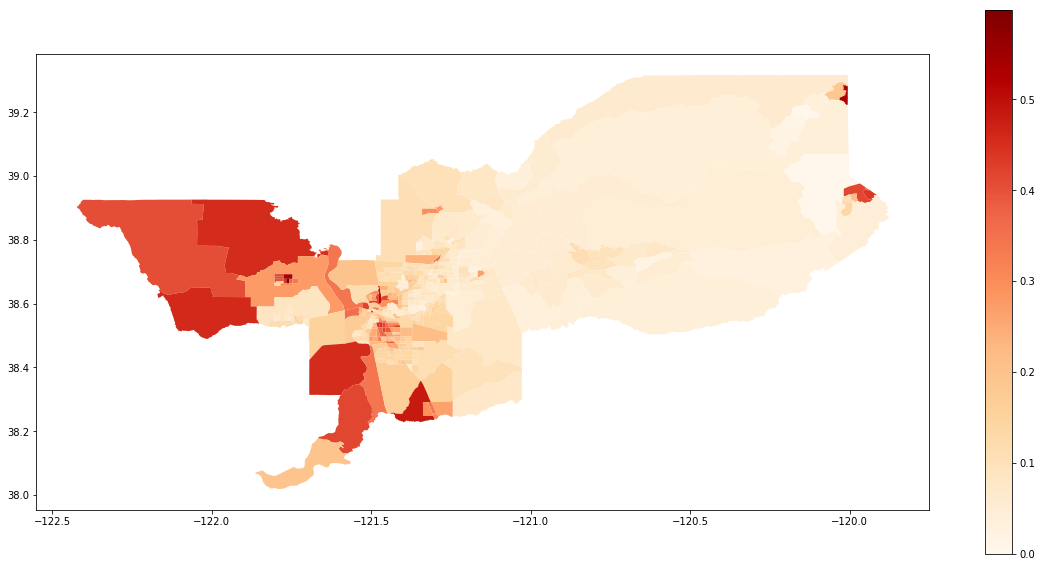

In [4]:
gdf['composition'] = gdf['HISP_'] / gdf['TOT_POP']

gdf.plot(column = 'composition',
         cmap = 'OrRd', 
         figsize=(20,10),
         legend = True)

### Single Value

#### Dissimilarity

The **Infer\_Segregation** function expect to receive a pre-fitted segregation class and then it uses the underlying data to iterate over the null hypothesis and comparing the results with point estimation of the index. Thus, we need to firstly estimate some measure. We can fit the classic Dissimilarity index:

In [5]:
from segregation.dissimilarity import Dissim
D = Dissim(gdf, 'HISP_', 'TOT_POP')
D.statistic

0.32184656076566864

The question that may rise is "Is this value of 0.32 statistically significant under some pre-specified circumstance?". To answer this, it is possible to rely on the **Infer_Segregation** function to generate several values of the same index (in this case the Dissimilarity Index) under the hypothesis and compare them with the one estimated by the dataset of Sacramento. To generate 1000 values assuming *evenness*, you can run:

In [6]:
infer_D_eve = Infer_Segregation(D, iterations = 1000, null_approach = "evenness", two_tailed = True)

This class has a quick plotting method to inspect the generated distribution with the estimated value from the sample (vertical red line):

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


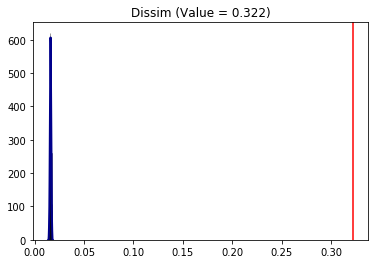

In [7]:
infer_D_eve.plot()

It is possible to see that clearly the value of 0.3218 is far-right in the distribution indicating that the hispanic group is, indeed, significantly segregated in terms of the Dissimilarity index under evenness. You can also check the mean value of the distribution using the **est_sim** attribute which represents all the D draw from the simulations:

In [8]:
infer_D_eve.est_sim.mean()

0.016114787679983627

The two-tailed p-value of the following hypothesis test:

$$H_0: under \ evenness, \ Sacramento \ IS \ NOT \ segregated \ in \ terms \ of \ the \ Dissimilarity \ index \ (D)$$
$$H_1: under \ evenness, \ Sacramento \ IS \ segregated \ in \ terms \ of \ the \ Dissimilarity \ index \ (D)$$

can be accessed with the **p_value** attribute:

In [9]:
infer_D_eve.p_value

0.0

Therefore, we can conclude that Sacramento is statistically segregated at 5% of significance level (p.value < 5%) in terms of D.

You can also test under different approaches for the null hypothesis:

In [10]:
infer_D_sys = Infer_Segregation(D, iterations = 10000, null_approach = "systematic", two_tailed = True)

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


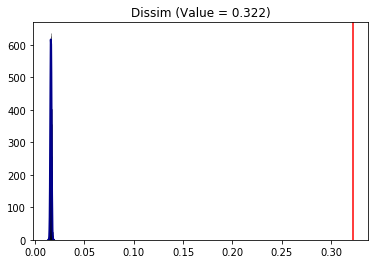

In [11]:
infer_D_sys.plot()

The conclusions are analogous as the *evenness* approach.

#### Relative Concentration

The **Infer_Segregation** wrapper can handle any class of the PySAL segregation module. It is possible to use it in the Relative Concentration (RCO) segregation index:

In [12]:
from segregation.relative_concentration import Relative_Concentration
RCO = Relative_Concentration(gdf, 'HISP_', 'TOT_POP')

Since RCO is an spatial index (i.e. depends on the spatial context), it makes sense to use the *permutation* null approach. This approach relies on randomly allocating the sample values over the spatial units and recalculating the chosen index to all iterations.

In [13]:
infer_RCO_per = Infer_Segregation(RCO, iterations = 1000, null_approach = "permutation", two_tailed = True)

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


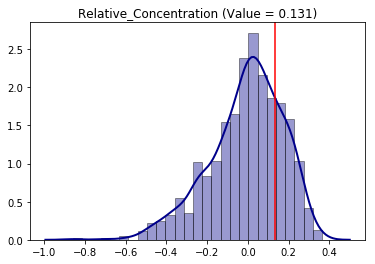

In [14]:
infer_RCO_per.plot()

In [15]:
infer_RCO_per.p_value

0.455

Analogously, the conclusion for the Relative Concentration index is that Sacramento is not significantly (under 5% of significance, because p-value > 5%) concentrated for the hispanic people.

Additionaly, it is possible to combine the null approaches establishing, for example, a permutation along with evenness of the frequency of the Sacramento hispanic group. With this, the conclusion of the Relative Concentration changes.

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


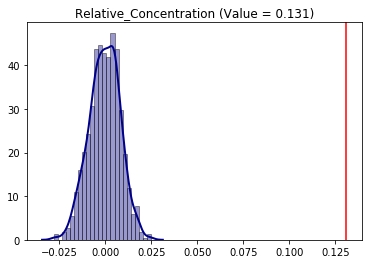

In [16]:
infer_RCO_eve_per = Infer_Segregation(RCO, iterations = 1000, null_approach = "even_permutation", two_tailed = True)
infer_RCO_eve_per.plot()

#### Relative Centralization

Using the same *permutation* approach for the Relative Centralization (RCE) segregation index:

In [19]:
from segregation.relative_centralization import Relative_Centralization
RCE = Relative_Centralization(gdf, 'HISP_', 'TOT_POP')
infer_RCE_per = Infer_Segregation(RCE, iterations = 1000, null_approach = "permutation", two_tailed = True)

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


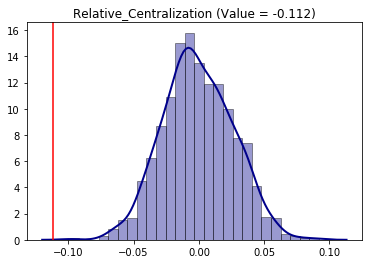

In [20]:
infer_RCE_per.plot()

The conclusion is that the hispanic group is negatively significantly (as the point estimation is in the left side of the distribution) in terms of centralization. This behavior can be, somehow, inspected in the map as the composition tends to be more concentraded outside of the center of the overall region.